In [14]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random

In [15]:
df_reembolso_resumo = pd.read_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/reembolso_resumo.csv", delimiter=',')

In [16]:
#df_reembolso_resumo = df_reembolso_resumo[df_reembolso_resumo.nome_completo != 'sem_info']
print(df_reembolso_resumo['soma_valor_reembolso'].sum())
print(df_reembolso_resumo['soma_valor_reembolso'].count())

873859541.69
210570


In [17]:
type(df_reembolso_resumo['cnpj_cpf_empresa'])

pandas.core.series.Series

In [18]:
df = df_reembolso_resumo[df_reembolso_resumo.cnpj_cpf_empresa.apply(lambda x: len(str(x)) != 11)]
df = df[df.soma_valor_reembolso > 4149]
df = df[df.qtde_reembolsos > 6]
#df = df[df.nome_completo != 'sem_info']
df['peso'] = (df['soma_valor_reembolso'].apply(lambda x: round(np.log(x), 3))) + df['qtde_reembolsos'].apply(lambda x: round(np.log(x), 3)) 

In [6]:
# 1.2.4. Ajuste do formato do cnpj/cpf dos geradores do reembolso
df["cnpj_cpf_empresa"] = df["cnpj_cpf_empresa"].apply(
lambda x: x.replace("/",""))
df["cnpj_cpf_empresa"] = df["cnpj_cpf_empresa"].apply(
lambda x: x.replace(".",""))
df["cnpj_cpf_empresa"] = df["cnpj_cpf_empresa"].apply(
lambda x: x.replace("-",""))
df["cnpj_cpf_empresa"] = df["cnpj_cpf_empresa"].apply(
lambda x: x.replace(" ",""))
df["cnpj_cpf_empresa"] = df.cnpj_cpf_empresa.apply(int)

In [7]:
df

,partido,uf,num_agente_politico,fornecedor,cnpj_cpf_empresa,soma_valor_reembolso,qtde_reembolsos,nome_completo,peso
6,AVANTE,AL,74558.0,ALMIR E SILVA LTDA,4979169000196,10467.50,42,sem_info,12.994
7,AVANTE,AL,74558.0,ALMIR E SILVA LTDA - EPP,4979169000196,10173.83,42,sem_info,12.966
8,AVANTE,AL,74558.0,ALMIR E SILVA LTDA - EPP,4979169000196,52063.06,172,sem_info,16.007
9,AVANTE,AL,74558.0,ALMIR E SILVA LTDA EPP,4979169000196,138252.54,424,sem_info,17.887
17,AVANTE,AL,74558.0,AUTO POSTO FOLHA MIUDA LTDA,13478481000197,6139.91,22,sem_info,11.814
21,AVANTE,AL,74558.0,AUTO POSTO LAGUNAR LTDA,40925141000130,11709.17,46,sem_info,13.197
50,AVANTE,AL,74558.0,Cia Aérea - AVIANCA,2575829000148,40283.23,124,sem_info,15.424
51,AVANTE,AL,74558.0,Cia Aérea - AVIANCA,2575829000148,29948.49,52,sem_info,14.258
52,AVANTE,AL,74558.0,Cia Aérea - AZUL,9296295000160,7853.90,11,sem_info,11.367
53,AVANTE,AL,74558.0,Cia Aérea - GOL,7575651000159,124475.78,330,sem_info,17.531


In [8]:
df['qtde_reembolsos'].describe()

count    13693.000000
mean        60.020083
std         95.428677
min          7.000000
25%         12.000000
50%         26.000000
75%         62.000000
max       1414.000000
Name: qtde_reembolsos, dtype: float64

In [21]:
G = nx.Graph()
G.add_nodes_from(df['fornecedor'], bipartite = 1)
empresa = [v for v in G.nodes if G.nodes[v]['bipartite'] == 1]

G.add_nodes_from(df['num_agente_politico'], bipartite=0)
deputado = [v for v in G.nodes if G.nodes[v]['bipartite'] == 0]

G.add_weighted_edges_from(df[['fornecedor', 'num_agente_politico','peso']].values)
'''                                         
edge_width = [a[2]['weight']/10 for a in G.edges(data=True)]

plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist = deputado, node_color='#bfbf7f', node_shape="h", node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color='#9f9fff', node_size=30)
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.2)
plt.title('Empresas reembolsadas')
plt.axis('off')
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Empresas_reembolsadas.png')
plt.show()
'''

'                                         \nedge_width = [a[2][\'weight\']/10 for a in G.edges(data=True)]\n\nplt.figure(figsize=(20,20))\npos = nx.kamada_kawai_layout(G)\n\nnx.draw_networkx_nodes(G, pos, nodelist = deputado, node_color=\'#bfbf7f\', node_shape="h", node_size=30)\nnx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color=\'#9f9fff\', node_size=30)\nnx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.2)\nplt.title(\'Empresas reembolsadas\')\nplt.axis(\'off\')\nplt.savefig(\'/home/gustavo/Downloads/Redes/Grafos/Empresas_reembolsadas.png\')\nplt.show()\n'

In [10]:
df['cnpj_cpf_empresa'].nunique()

4518

In [11]:
df['num_agente_politico'].nunique()

646

In [22]:
G.number_of_nodes()

6062

In [23]:
G.number_of_edges()

11543

In [30]:
nx.density(G)

0.0006116099594322525

In [31]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

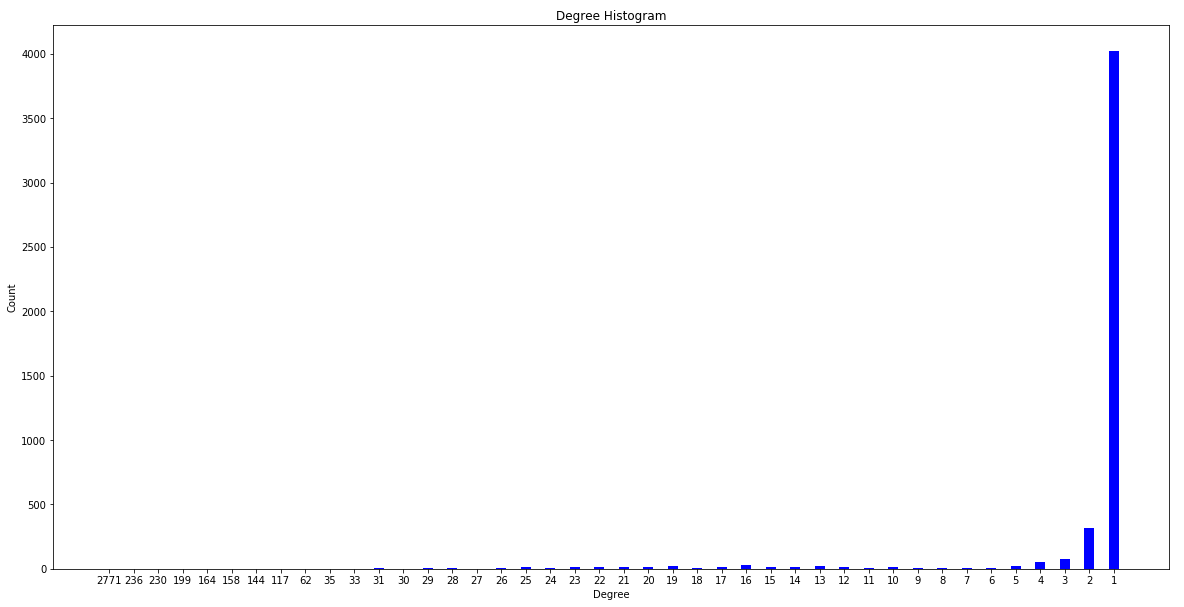

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(range(len(deg)), cnt, width=0.40, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks(range(len(deg)))
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
'''
nx.draw_networkx_nodes(G, pos = nx.kamada_kawai_layout(G), node_size=20, node_color=colors)
nx.draw_networkx_edges(G, pos = nx.kamada_kawai_layout(G), alpha=0.4)
'''
plt.show()

In [20]:
nx.degree(G)

DegreeView({4979169000196: 1, 13478481000197: 1, 40925141000130: 1, 2575829000148: 390, 9296295000160: 369, 7575651000159: 561, 2012862000160: 598, 8418303000130: 1, 4221587000110: 2, 6: 451, 40921967000120: 1, 33000118001302: 1, 4206050008165: 2, 40432544015250: 3, 19021255000169: 2, 72431008487: 1, 6071706000120: 9, 38024675000143: 22, 12589675887: 1, 7074792000198: 1, 35075597000380: 1, 1: 349, 7047251000170: 12, 9336183000195: 1, 9624281000128: 1, 2265372000175: 2, 3773814000157: 1, 15193908000136: 17, 17607852000144: 2, 5592212000129: 1, 23552250000130: 2, 21548793000158: 1, 11477421000124: 1, 26890271000153: 2, 3207411000140: 1, 22259454000114: 3, 24649057000184: 1, 2558157000162: 132, 7027378000128: 2, 306597003112: 27, 38732285000128: 1, 66354457000102: 2, 8884038000186: 28, 12609733000107: 1, 18715383000140: 5, 17403742000160: 1, 16631418000137: 1, 19224740000130: 7, 5548055000154: 1, 493333487: 1, 4949680000145: 2, 10835932000108: 9, 41054867000107: 1, 14678075000130: 1, 1611

In [30]:
import operator
dic1 = dict(nx.degree(G))
dic1 = sorted(dic1.items(), key = operator.itemgetter(1), reverse=True)
dic1 = dict(dic1)
dep_values = [v for k,v in dic1.items() if len(str(k))>=11]
emp_values = [v for k,v in dic1.items() if len(str(k))<11]

dep = sum(dep_values)/len(dep_values)
emp = sum(emp_values)/len(emp_values)
print(dep)
print(emp)


2.0168784373222075
15.780735107731305


In [35]:
dic1

{'Cia Aérea - TAM': 591,
 'Cia Aérea - GOL': 555,
 'RAMAL': 451,
 'Cia Aérea - AVIANCA': 387,
 'Cia Aérea - AZUL': 362,
 'CELULAR FUNCIONAL': 349,
 'CORREIOS - SEDEX CONVENCIONAL': 154,
 'TELEFONICA BRASIL S.A.': 131,
 'CORREIOS - CARTA COMERCIAL': 100,
 'TELEFÔNICA BRASIL S/A - VIVO': 77,
 'CLARO S/A': 70,
 'CASCOL COMBUSTIVEIS PARA VEICULOS LTDA': 65,
 'TIM CELULAR S.A.': 65,
 'TELEMAR NORTE LESTE S/A': 63,
 'TELEFÔNICA BRASIL S.A.': 62,
 'CORREIOS - ENCOMENDA PAC': 55,
 160515.0: 49,
 'TIM CELULAR S/A': 44,
 'PARLABRASIL EIRELI - ME': 43,
 'Conde & Dell Aringa - Desenvolvimento de Softwares Ltda.': 43,
 178905.0: 43,
 'TELEFONICA BRASIL S.A - VIVO.': 42,
 141553.0: 42,
 141450.0: 41,
 159238.0: 41,
 178922.0: 40,
 160569.0: 40,
 'Cia Aérea - PASSAREDO': 39,
 178933.0: 39,
 141405.0: 39,
 160592.0: 39,
 73768.0: 38,
 178934.0: 38,
 74398.0: 38,
 'CORREIOS - MALA DIRETA POSTAL BÁSICA': 37,
 178829.0: 37,
 160665.0: 37,
 178836.0: 36,
 74010.0: 36,
 141527.0: 36,
 178930.0: 36,
 178845

In [39]:
#Tabela 8
dic1 = dict(nx.degree_centrality(G))
dic1 = sorted(dic1.items(), key = operator.itemgetter(1), reverse=True)
dic1

[('Cia Aérea - TAM', 0.09750866193697409),
 ('Cia Aérea - GOL', 0.09156904801187922),
 ('RAMAL', 0.07441016333938294),
 ('Cia Aérea - AVIANCA', 0.06385084969476984),
 ('Cia Aérea - AZUL', 0.05972611780234285),
 ('CELULAR FUNCIONAL', 0.05758125721828081),
 ('CORREIOS - SEDEX CONVENCIONAL', 0.025408348457350273),
 ('TELEFONICA BRASIL S.A.', 0.021613595116317438),
 ('CORREIOS - CARTA COMERCIAL', 0.01649892756970797),
 ('TELEFÔNICA BRASIL S/A - VIVO', 0.012704174228675136),
 ('CLARO S/A', 0.011549249298795578),
 ('CASCOL COMBUSTIVEIS PARA VEICULOS LTDA', 0.01072430292031018),
 ('TIM CELULAR S.A.', 0.01072430292031018),
 ('TELEMAR NORTE LESTE S/A', 0.01039432436891602),
 ('TELEFÔNICA BRASIL S.A.', 0.01022933509321894),
 ('CORREIOS - ENCOMENDA PAC', 0.009074410163339382),
 (160515.0, 0.008084474509156905),
 ('TIM CELULAR S/A', 0.007259528130671506),
 ('PARLABRASIL EIRELI - ME', 0.007094538854974426),
 ('Conde & Dell Aringa - Desenvolvimento de Softwares Ltda.',
  0.007094538854974426),
 (178

In [34]:
dic = dict(nx.degree(G))
int_keyed_values = [v for k,v in dic.items() if type(k) is int]
str_keyed_values = [v for k,v in dic.items() if type(k) is str]

int_mean = sum(int_keyed_values)/len(int_keyed_values)
str_mean = sum(str_keyed_values)/len(str_keyed_values)
print(int_mean)
print(str_mean)

1.5358565737051793
28.20731707317073


In [35]:
nx.density(G)

0.0006116099594322525

In [36]:
nx.average_clustering(G)

0.0

In [37]:
d = dict(nx.degree(G))

In [38]:
nx.degree(G)

DegreeView({4979169000196: 1, 13478481000197: 1, 40925141000130: 1, 2575829000148: 164, 9296295000160: 158, 7575651000159: 230, 2012862000160: 236, 8418303000130: 1, 4221587000110: 1, 6: 199, 40921967000120: 1, 33000118001302: 1, 4206050008165: 2, 40432544015250: 1, 19021255000169: 1, 72431008487: 1, 6071706000120: 4, 38024675000143: 7, 12589675887: 1, 7074792000198: 1, 35075597000380: 1, 1: 144, 7047251000170: 6, 9336183000195: 1, 9624281000128: 1, 2265372000175: 2, 3773814000157: 1, 15193908000136: 9, 17607852000144: 1, 5592212000129: 1, 23552250000130: 1, 21548793000158: 1, 11477421000124: 1, 26890271000153: 2, 3207411000140: 1, 22259454000114: 2, 24649057000184: 1, 2558157000162: 62, 7027378000128: 1, 306597003112: 17, 38732285000128: 1, 66354457000102: 2, 8884038000186: 16, 12609733000107: 1, 18715383000140: 4, 17403742000160: 1, 16631418000137: 1, 19224740000130: 6, 5548055000154: 1, 493333487: 1, 4949680000145: 1, 10835932000108: 3, 41054867000107: 1, 14678075000130: 1, 16119840